In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler

In [3]:
trees = ObjIter([Tree(fc.eightb.preselection.NMSSM_XYY_YToHH_8b_MX_1200_MY_500),Tree(fc.eightb.preselection.Bkg_MC_List)])

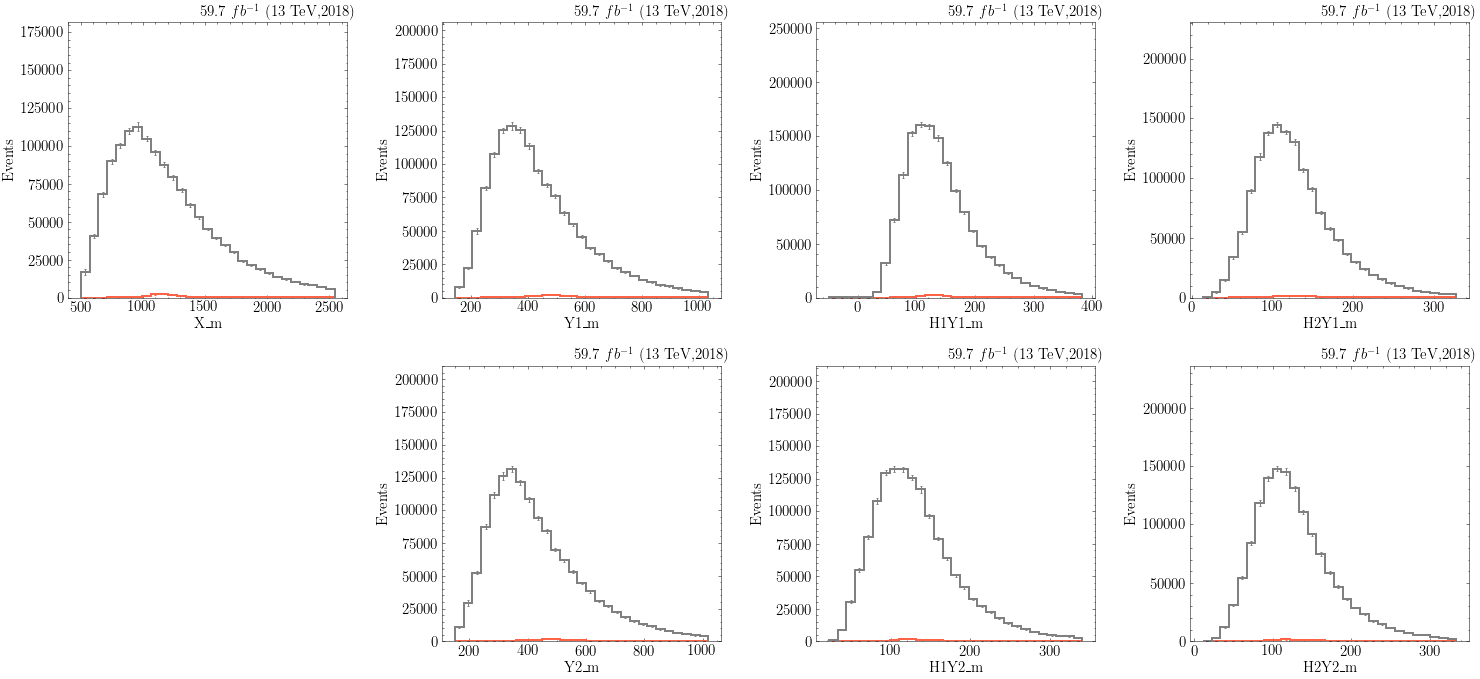

Timer unit: 1e-06 s

Total time: 7.71748 s
File: /uscms_data/d3/ekoenig/8BAnalysis/studies/sixbStudies/utils/plotUtils/multi_plotter.py
Function: hist_multi at line 99

Line #      Hits         Time  Per Hit   % Time  Line Contents
    99                                           def hist_multi(arrays, bins=None, weights=None, density = False, 
   100                                                           cumulative=False, scale=None, lumi=None,
   101                                                           is_data=False, is_signal=False,stacked=False, 
   102                                                           histo=True, ratio=False,correlation=False,
   103                                                           figax=None, **kwargs):
   104         7         22.0      3.1      0.0      if figax is None: figax = plt.subplots()
   105         7         13.0      1.9      0.0      fig,ax = figax
   106                                               
   107                 

In [40]:
%lprun -f hist_multi study.quick(trees,varlist=['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],dim=(-1,4),);

In [ ]:
from utils.plotUtils.histogram import Histo,histogram

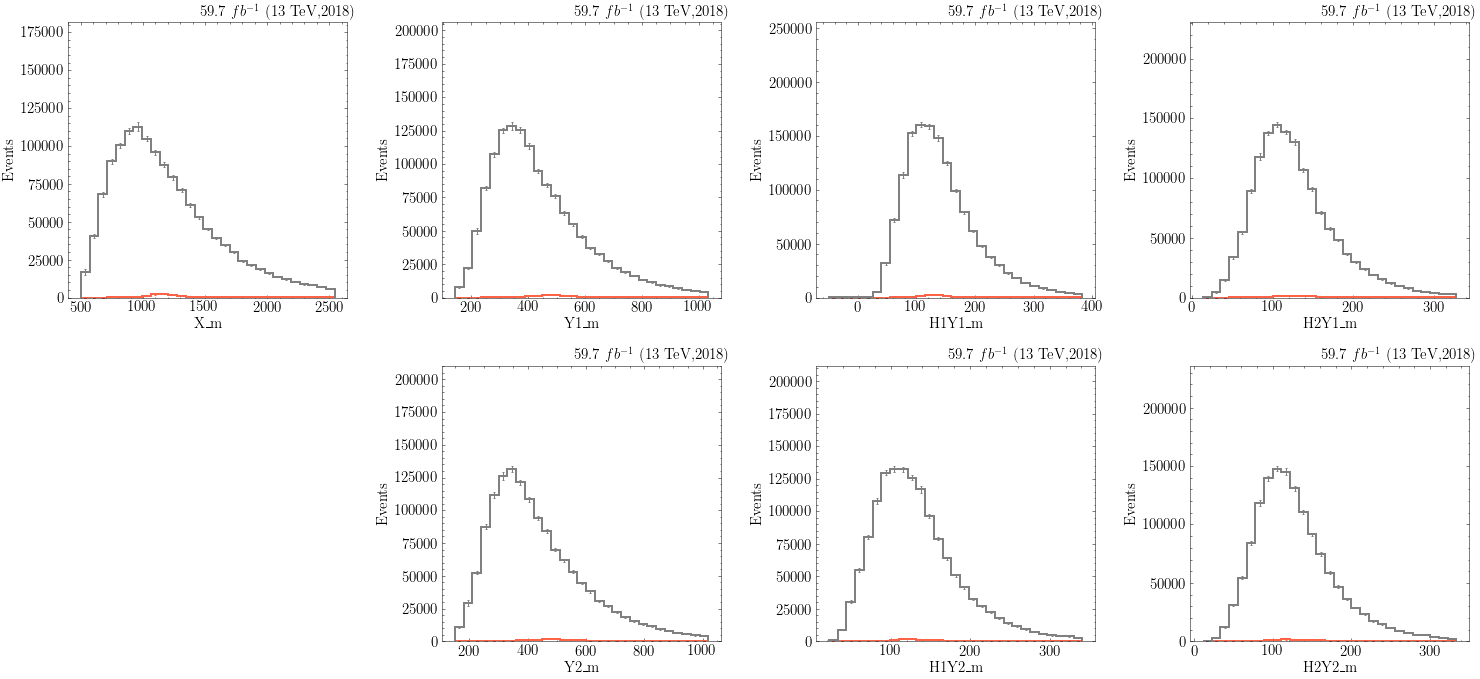

Timer unit: 1e-06 s

Total time: 7.68662 s
File: /uscms_data/d3/ekoenig/8BAnalysis/studies/sixbStudies/utils/plotUtils/histogram.py
Function: __init__ at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                               def __init__(self, array, bins=None, weights=None, density=False, cumulative=False, lumi=None, 
    18                                                            label_stat='events', is_data=False, is_signal=False, sumw2=True, scale=1,__id__=None,
    19                                                            **kwargs):
    20        14    1669473.0 119248.1     21.7          if weights is not None: weights = flatten(ak.ones_like(array)*weights)
    21                                           
    22        14    1414144.0 101010.3     18.4          self.array = flatten(array)
    23        14         36.0      2.6      0.0          self.counts = len(self.array)
    24                                        

In [ ]:
%lprun -f Histo.__init__ study.quick(trees,varlist=['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],dim=(-1,4),);

In [ ]:
%lprun -f Histo.histogram study.quick(trees,varlist=['X_m','Y1_m','H1Y1_m','H2Y1_m',None,'Y2_m','H1Y2_m','H2Y2_m'],dim=(-1,4),);

UsageError: Could not find module Histo.histogram.
AttributeError: type object 'Histo' has no attribute 'histogram'


In [29]:
array,weights = trees[1].X_m,trees[1].scale

In [30]:
array,weights = flatten(array),flatten(weights)

In [31]:
bins=np.linspace(0,2500,30)